In [1]:
! pip install gensim

In [2]:
pip install pandas_ta 

Note: you may need to restart the kernel to use updated packages.


Here I Install gensim which is needed to load vectors from the .kv file

In [2]:

from gensim.models import KeyedVectors
import numpy as np
# Setting the script name.
script_name = "Reliance"

# Load the word embeddings
link = "/kaggle/input/trading-dataset/Machine Learning Assignment Dataset/Reliance_embeddings.kv"
word_vectors = KeyedVectors.load(link, mmap='r')

# Getting the vector keys (or filenames in this case)
metadata = word_vectors.index_to_key
W=[]
# Print the first 5 keys and their associated vectors
for key in metadata:  # Adjust the range as needed to print more or fewer keys
    W.append(word_vectors[key])
    


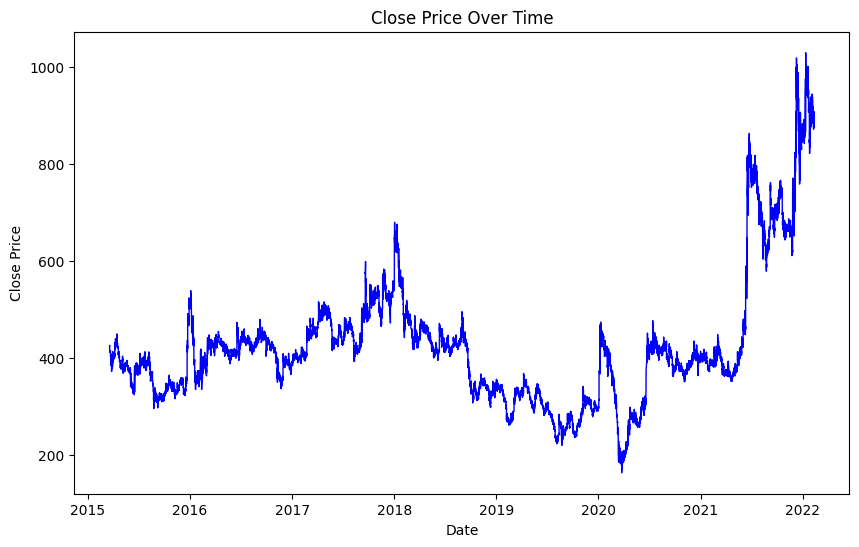

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Corrected import
%matplotlib inline

# Load CSV
load_csv = pd.read_csv("/kaggle/input/trading-dataset/Machine Learning Assignment Dataset/Reliance.csv")
df = pd.DataFrame(load_csv)
df['date'] = pd.to_datetime(df['date'])

# Plot the 'close' column over time
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better visualization
plt.title("Close Price Over Time")  # Add title to the plot
plt.xlabel("Date")  # Label for X-axis
plt.ylabel("Close Price")  # Label for Y-axis
plt.plot(df["date"], df['close'], color='blue', linewidth=1)  # Use the date directly for x-axis

plt.show()  # Display the plot


In [4]:
import pandas_ta as ta
Stock_price=df
Stock_price
Stock_price['rsi'] = ta.rsi(Stock_price.close)
Stock_price['ema'] = ta.ema(Stock_price.close)
Stock_price['Target'] = Stock_price['close']-df.open
Stock_price['Actual Target']= Stock_price['close'].shift(-1)
Stock_price['Target class'] = [1 if Stock_price['Target'][i] > 0 else 0 for i in range(len(Stock_price))]
Stock_price = Stock_price[Stock_price['volume']!=0]
Stock_price =Stock_price.dropna()


In [5]:

cols = ['open','high','low','close','volume','ema','rsi','Target','Actual Target','Target class']
Stock_price= Stock_price[cols]
Stock_price=Stock_price.dropna()

Here is the stock prices along the data time

In [6]:

Input_data = np.array(Stock_price.iloc[:29979])
Validation_data = np.array(Stock_price.iloc[29979:])
Cross_validation = np.array(Stock_price.iloc[29979:])
Output_data = W
Input_data

array([[ 4.2300e+02,  4.2305e+02,  4.2250e+02, ..., -5.0000e-01,
         4.2250e+02,  0.0000e+00],
       [ 4.2260e+02,  4.2275e+02,  4.2210e+02, ..., -1.0000e-01,
         4.2265e+02,  0.0000e+00],
       [ 4.2275e+02,  4.2365e+02,  4.2265e+02, ..., -1.0000e-01,
         4.2305e+02,  0.0000e+00],
       ...,
       [ 3.7640e+02,  3.7640e+02,  3.7630e+02, ..., -1.0000e-01,
         3.7625e+02,  0.0000e+00],
       [ 3.7640e+02,  3.7640e+02,  3.7625e+02, ..., -1.5000e-01,
         3.7600e+02,  0.0000e+00],
       [ 3.7640e+02,  3.7640e+02,  3.7570e+02, ..., -4.0000e-01,
         3.7705e+02,  0.0000e+00]])

pp install pan

In [7]:

import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data preparation
# Assuming you have your OHLC data in a NumPy array `ohlc_data` with shape (n_samples, 4)
# And the corresponding 512-dimensional vectors in a NumPy array `vectors` with shape (n_samples, 512)

# Example of random data (replace this with your actual data)
n_samples = 29979
X = Input_data  # OHLC data (replace with actual OHLC data)
y = Output_data  # 512-dimensional vectors (replace with actual vectors)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

# Wrap XGBoost with MultiOutputRegressor to handle multi-output regression
multi_output_model = MultiOutputRegressor(xgb_model)

multi_output_model.fit(X,y)

y_pred = multi_output_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict vectors for new OHLC records (replace `new_ohlc_data` with actual data)
new_ohlc_data = Validation_data  # Example data (replace with actual new OHLC data)
predicted_vectors = multi_output_model.predict(new_ohlc_data)

predicted_vectors

Mean Squared Error: 0.00020295225840527564


array([[2.7879036e-05, 2.7677086e-06, 2.0576222e-03, ..., 5.6703295e-05,
        8.9058697e-01, 2.6574789e-08],
       [2.7879036e-05, 2.7677086e-06, 2.1595205e-03, ..., 6.8684101e-05,
        8.8519901e-01, 2.6574789e-08],
       [2.7879036e-05, 2.7677086e-06, 2.7272976e-03, ..., 6.1434890e-05,
        8.8630772e-01, 2.6574789e-08],
       ...,
       [1.8771482e-04, 2.7677086e-06, 3.9542895e-03, ..., 8.6987893e-05,
        8.8412136e-01, 2.6574789e-08],
       [1.8771482e-04, 2.7677086e-06, 2.9689162e-03, ..., 9.5120129e-05,
        8.8436675e-01, 2.6574789e-08],
       [1.8771482e-04, 2.7677086e-06, 5.7271854e-03, ..., 7.6839024e-05,
        8.8428760e-01, 2.6574789e-08]], dtype=float32)

In [8]:
# Concatenate the new vectors with the given vectors 
print(np.array(Output_data).shape)
print(predicted_vectors.shape)
combined_vectors = np.vstack((Output_data,predicted_vectors))
print(combined_vectors.shape)
print(Stock_price.shape)


(29979, 512)
(556883, 512)
(586862, 512)
(586862, 10)


In [ ]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Assuming input_data is your OHLC and additional data
# Combine input data with vectors
combined_data = np.hstack((Stock_price, combined_vectors))

# Normalize the combined data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(combined_data)

# Create sequences for LSTM model
sequence_length = 30  # Example window size for sequence
X = []
y = []

for i in range(sequence_length, len(normalized_data)):
    X.append(normalized_data[i-sequence_length:i, :])
    y.append(normalized_data[i, 3])  # Assuming 'close' is at index 3

X, y = np.array(X), np.array(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Predict Future Closing Prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)